In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('Online_Retail.csv', encoding='iso-8859-1')

In [3]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
143638,548708,21735,TWO DOOR CURIO CABINET,2,03/04/2020 12:41,12.75,13269.0,United Kingdom
434470,574046,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,1,02/11/2020 13:19,0.42,15743.0,United Kingdom
135415,547895,22518,CHILDS GARDEN BRUSH BLUE,1,28/03/2020 10:52,2.10,18118.0,United Kingdom
325784,565456,37370,RETRO COFFEE MUGS ASSORTED,1,04/09/2020 16:12,1.65,16629.0,United Kingdom
244334,558484,22989,SET 2 PANTRY DESIGN TEA TOWELS,6,30/06/2020 10:09,3.25,14267.0,United Kingdom
475950,576927,22628,PICNIC BOXES SET OF 3 RETROSPOT,4,17/11/2020 11:02,4.95,12567.0,France
459230,575870,21822,GLITTER CHRISTMAS TREE WITH BELLS,12,11/11/2020 12:46,0.79,15557.0,United Kingdom
451135,575179,22644,CERAMIC CHERRY CAKE MONEY BANK,12,09/11/2020 08:11,1.45,14284.0,United Kingdom
499632,578680,82482,WOODEN PICTURE FRAME WHITE FINISH,6,25/11/2020 08:23,2.95,16458.0,United Kingdom
406846,571837,22554,PLASTERS IN TIN WOODLAND ANIMALS,2,19/10/2020 12:11,1.65,16470.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#cambio del nombre de las columnas a minusculas
new_col_name = []

for old_name in df.columns:
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_name.append(name_no_spaces)

df.columns = new_col_name


In [6]:
#cambio de tipo de la columna invoce_date a datetime
df['invoice_date']=pd.to_datetime(df['invoice_date'], format="%d/%m/%Y %H:%M")

In [7]:
#se llenan los nan de la columna customer_id con 0
df['customer_id'] = df['customer_id'].fillna(0)

In [8]:
#cambio del tipo de la columna customer_id a entero
df['customer_id'] = df['customer_id'].astype(int)

In [9]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
206534,554941,47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,2,2020-05-27 13:53:00,1.25,16016,United Kingdom
630,536415,22186,RED STAR CARD HOLDER,5,2019-12-01 11:57:00,2.95,12838,United Kingdom
520747,580298,22537,MAGIC DRAWING SLATE DINOSAUR,24,2020-12-02 13:54:00,0.42,17086,United Kingdom
163132,550541,22100,SKULLS SQUARE TISSUE BOX,1,2020-04-19 11:33:00,2.46,0,United Kingdom
304427,563576,21676,FLOWERS STICKERS,12,2020-08-17 15:06:00,0.85,12748,United Kingdom
338080,566495,23436,VINTAGE CHRISTMAS GIFT BAG LARGE,20,2020-09-13 11:14:00,1.25,15529,United Kingdom
181573,552493,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,10,2020-05-09 16:21:00,2.46,0,United Kingdom
105165,545217,21627,ELEPHANT CARNIVAL POUFFE,1,2020-02-28 16:59:00,29.17,0,United Kingdom
421216,572924,22193,RED DINER WALL CLOCK,4,2020-10-27 08:56:00,8.50,13416,United Kingdom
206509,554940,23108,SET OF 10 LED DOLLY LIGHTS,2,2020-05-27 13:49:00,6.25,12494,France


In [10]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
#se remplaza el nombre de los paises agregaqdos como EIRE y RSA para unificar todos los nombres en ingles y mayusculas y minusculas 
df['region']= df['region'].replace('EIRE', 'Ireland')

In [12]:
df['region']= df['region'].replace('RSA', 'Sudafrica')

In [13]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [14]:
#verificacion de los valores menores a cero en la columan quantity. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2020-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2020-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2020-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2020-12-09 11:58:00,1.25,17315,United Kingdom


In [15]:
#verificacion de los valores menores a cero en la columan unit_price. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,0,United Kingdom


In [16]:
#creacion de una nueva columana que calcula el total vendido por factura 
df['total'] = df['quantity'] * df['unit_price']

In [17]:
#se convierten las descripciones a minuscula para unificar el formato 
df['description'] = df['description'].str.lower()

In [18]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
488705,577845,84991,60 teatime fairy cake cases,24,2020-11-22 10:44:00,0.55,18139,United Kingdom,13.20
159854,550389,22292,hanging chick yellow decoration,3,2020-04-18 11:53:00,1.45,17284,United Kingdom,4.35
310457,564186,23118,parisienne jewellery drawer,2,2020-08-23 15:20:00,7.50,15755,United Kingdom,15.00
275108,560937,62018,sombrero,1,2020-07-22 10:52:00,1.95,17920,United Kingdom,1.95
90710,544064,22442,grow your own flowers set of 3,1,2020-02-15 13:50:00,7.95,17114,United Kingdom,7.95
526812,580677,21693,small hammered silver candlepot,6,2020-12-05 14:40:00,2.95,16200,United Kingdom,17.70
511270,579473,23375,50's christmas paper gift bag,10,2020-11-29 15:17:00,0.82,13198,United Kingdom,8.20
153683,C549786,21034,rex cash+carry jumbo shopper,-1,2020-04-12 11:58:00,0.95,14071,United Kingdom,-0.95
76908,542664,22309,tea cosy red stripe,1,2020-01-31 12:14:00,4.96,0,United Kingdom,4.96
259943,559784,15056N,edwardian parasol natural,60,2020-07-12 12:07:00,4.95,16839,United Kingdom,297.00


In [19]:
#verificar que no existe ningun valor 0 en la columna quantity; sin embargo tener en cuenta que si existen aun menores a 0 
df[df['quantity'] == 0]


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [20]:
#se decide eliminar del dataframe los datos que en unit_price y en customer_id sean iguales a 0, dado que consideramos no aportan ningun informacion util para futuros analisis
ceros = df.query(('unit_price >= 0 & customer_id >= 0'))
display(ceros)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60


In [21]:
#verificacion relacionado con los datos eliminados 
ceros['description'].unique()

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'lost',
       'cream hanging heart t-light holder', 'paper craft  little birdie'],
      dtype=object)

In [22]:
#verificacion relacionado con los datos eliminados 
ceros['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [23]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.year.unique()


array([2019, 2020])

In [24]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
#se filta el data frame despues de las verificaciones anteriores para conservar unicamente los datos que sean diferentes a 0 
df = df.query(('unit_price >= 0 & customer_id >= 0 & quantity >= 0'))

In [26]:
df.sample(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
160862,550470,22993,set of 4 pantry jelly moulds,1,2020-04-18 13:49:00,2.46,0,United Kingdom,2.46
188051,553013,22969,homemade jam scented candles,2,2020-05-12 18:19:00,3.29,0,United Kingdom,6.58
172374,551532,22792,fluted antique candle holder,12,2020-05-01 14:17:00,0.85,16554,United Kingdom,10.20
533813,581116,22142,christmas craft white fairy,6,2020-12-07 12:21:00,1.45,17232,United Kingdom,8.70
316611,564755,22326,round snack boxes set of4 woodland,1,2020-08-30 10:31:00,5.79,0,United Kingdom,5.79
434185,574034,22196,small heart measuring spoons,1,2020-11-02 12:45:00,0.85,17841,United Kingdom,0.85
157838,550213,22424,enamel bread bin cream,1,2020-04-15 10:42:00,24.96,0,United Kingdom,24.96
402185,571475,22114,hot water bottle tea and sympathy,1,2020-10-17 14:42:00,4.25,15033,United Kingdom,4.25
201923,554347,23202,jumbo bag vintage leaf,30,2020-05-24 08:21:00,2.08,16523,United Kingdom,62.40
396601,571082,21915,red harmonica in box,1,2020-10-13 15:25:00,2.46,0,United Kingdom,2.46


In [27]:
#se verificaron los posibles datos duplicados en todas las columanas posibles y concluimos que los duplicados existentes son coherentes. No se elimina ninguno
df['stock_code'].duplicated().sum()

527342

In [28]:
df.describe()

,quantity,invoice_date,unit_price,customer_id,total
count,531283.000000,531283,531283.000000,531283.000000,531283.000000
mean,10.655299,2020-07-04 13:35:47.493444352,3.898954,11455.241500,20.077218
min,1.000000,2019-12-01 08:26:00,0.000000,0.000000,0.000000
25%,1.000000,2020-03-28 11:59:00,1.250000,0.000000,3.750000
50%,3.000000,2020-07-20 12:01:00,2.080000,14375.000000,9.900000
75%,10.000000,2020-10-19 12:35:00,4.130000,16261.000000,17.700000
max,80995.000000,2020-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.830617,NaN,35.876279,6795.280513,270.058254


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531283 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    531283 non-null  object        
 1   stock_code    531283 non-null  object        
 2   description   530691 non-null  object        
 3   quantity      531283 non-null  int64         
 4   invoice_date  531283 non-null  datetime64[ns]
 5   unit_price    531283 non-null  float64       
 6   customer_id   531283 non-null  int32         
 7   region        531283 non-null  object        
 8   total         531283 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 38.5+ MB


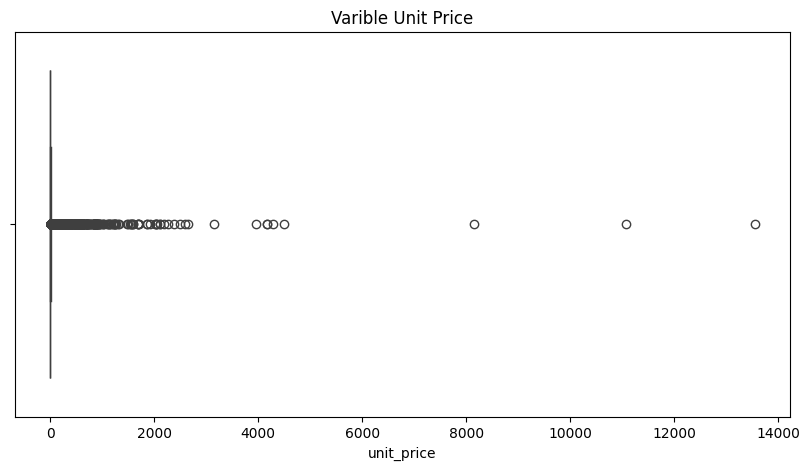

In [54]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['unit_price'])
plt.title('Varible Unit Price')
plt.show()

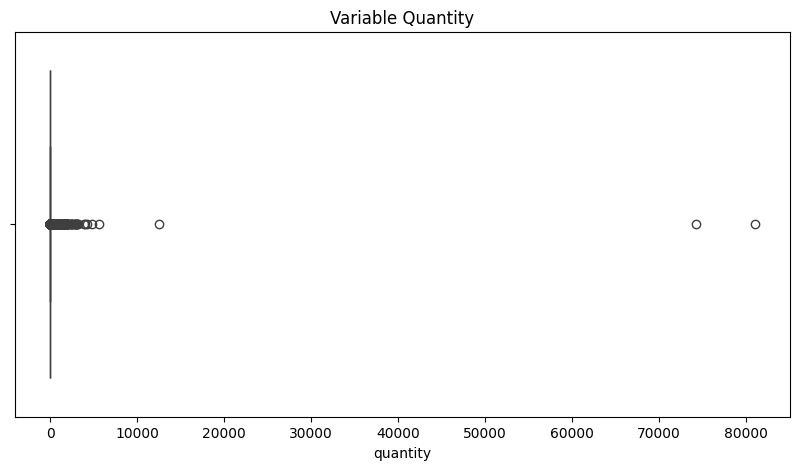

In [55]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['quantity'])
plt.title('Variable Quantity')
plt.show()

In [32]:
df.describe()

,quantity,invoice_date,unit_price,customer_id,total
count,531283.000000,531283,531283.000000,531283.000000,531283.000000
mean,10.655299,2020-07-04 13:35:47.493444352,3.898954,11455.241500,20.077218
min,1.000000,2019-12-01 08:26:00,0.000000,0.000000,0.000000
25%,1.000000,2020-03-28 11:59:00,1.250000,0.000000,3.750000
50%,3.000000,2020-07-20 12:01:00,2.080000,14375.000000,9.900000
75%,10.000000,2020-10-19 12:35:00,4.130000,16261.000000,17.700000
max,80995.000000,2020-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.830617,NaN,35.876279,6795.280513,270.058254


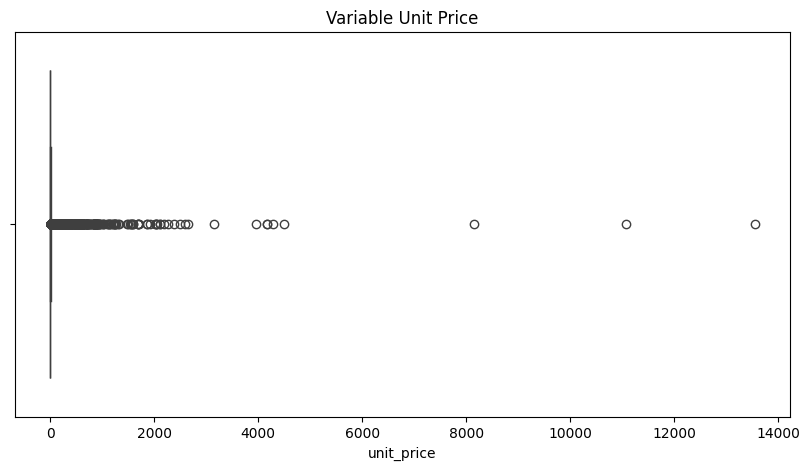

In [56]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df ['unit_price'])
plt.title('Variable Unit Price')
plt.show()

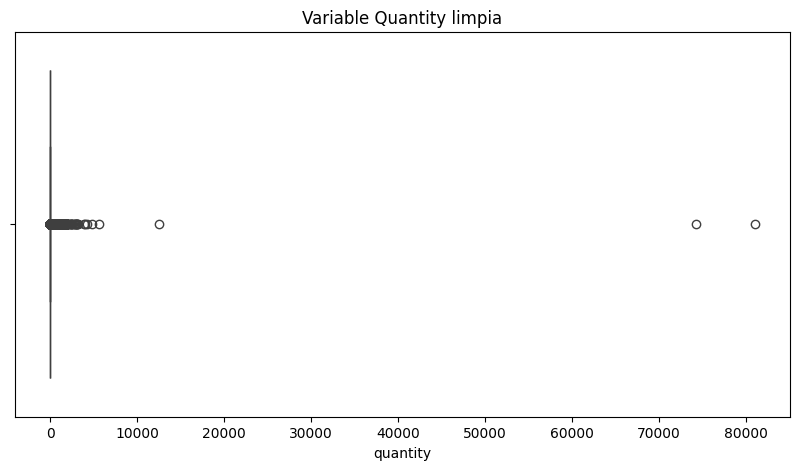

In [57]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['quantity'])
plt.title('Variable Quantity limpia')
plt.show()

In [35]:

# Persistiendo los cambios

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
current_date = datetime.now()

# Calcula Recencia, Frecuencia y Valor Monetario
rfm_df = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (current_date - x.max()).days,
    'total': ['sum', 'count']
})

rfm_df.columns = ['Recency', 'Monetary', 'Frequency']
rfm_df.reset_index(inplace=True)

# Asigna puntuaciones RFM
rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 5, labels=False, duplicates='drop') + 1
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'], 5, labels=False, duplicates='drop') + 1

# Puedes combinar las puntuaciones en un código RFM para cada cliente
rfm_df['RFM_Score'] = rfm_df['R_rank'] + rfm_df['F_rank'] + rfm_df['M_rank']

# Muestra los resultados
display(rfm_df.head())

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score
0,0,1301,1755276.64,133359,1,5,5,11
1,12346,1627,77183.60,1,5,1,5,11
2,12347,1303,4310.00,182,1,5,5,11
3,12348,1376,1797.24,31,4,3,4,11
4,12349,1319,1757.55,73,2,4,4,10


In [36]:
rfm_df['RFM_Score'].value_counts()

RFM_Score
11    693
7     646
10    632
9     625
8     537
12    370
6     322
5     176
13    159
4      91
14     46
3      35
15      8
Name: count, dtype: int64

In [37]:
def segment_customer(row):
    if row['RFM_Score'] > 12:
        return 'Alto valor'
    elif row['RFM_Score'] > 9:
        return 'Leal'
    elif row['RFM_Score'] > 6:
        return 'Potencial'
    elif row['RFM_Score'] > 3:
        return 'Activo'
    else:
        return 'Cliente Perdido' 

# Aplica la función de segmentación a cada fila del DataFrame
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Muestra los resultados
display(rfm_df.head())

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment
0,0,1301,1755276.64,133359,1,5,5,11,Leal
1,12346,1627,77183.60,1,5,1,5,11,Leal
2,12347,1303,4310.00,182,1,5,5,11,Leal
3,12348,1376,1797.24,31,4,3,4,11,Leal
4,12349,1319,1757.55,73,2,4,4,10,Leal


In [38]:
# Conteo de clientes por segmento
print(rfm_df['Segment'].value_counts())

Segment
Potencial          1808
Leal               1695
Activo              589
Alto valor          213
Cliente Perdido      35
Name: count, dtype: int64


C:\Users\karin\AppData\Local\Temp\ipykernel_36664\2060644836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')


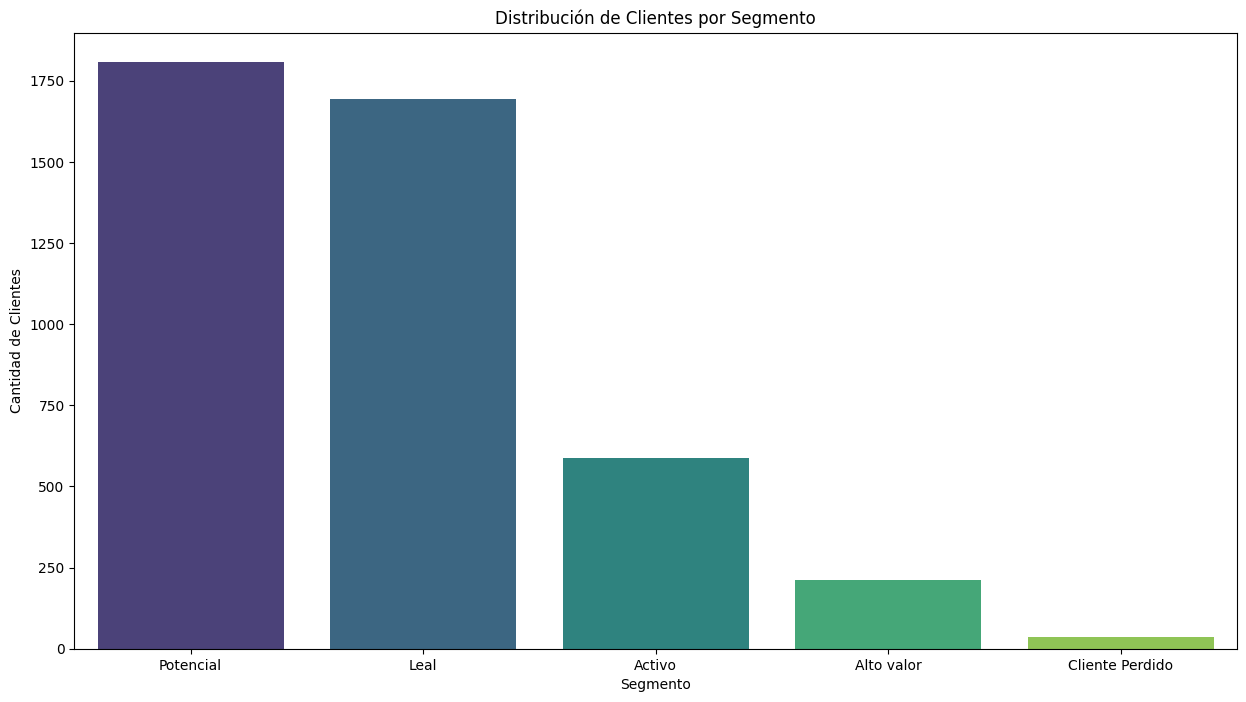

In [59]:
# Gráfico de Barras de la Distribución de Segmentos
plt.figure(figsize=(15, 8))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')
plt.title('Distribución de Clientes por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
#plt.xticks(rotation=45)
plt.show()


C:\Users\karin\AppData\Local\Temp\ipykernel_36664\128862743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_df, x='Segment', y='Recency', palette='viridis', order=rfm_df['Segment'].value_counts().index)


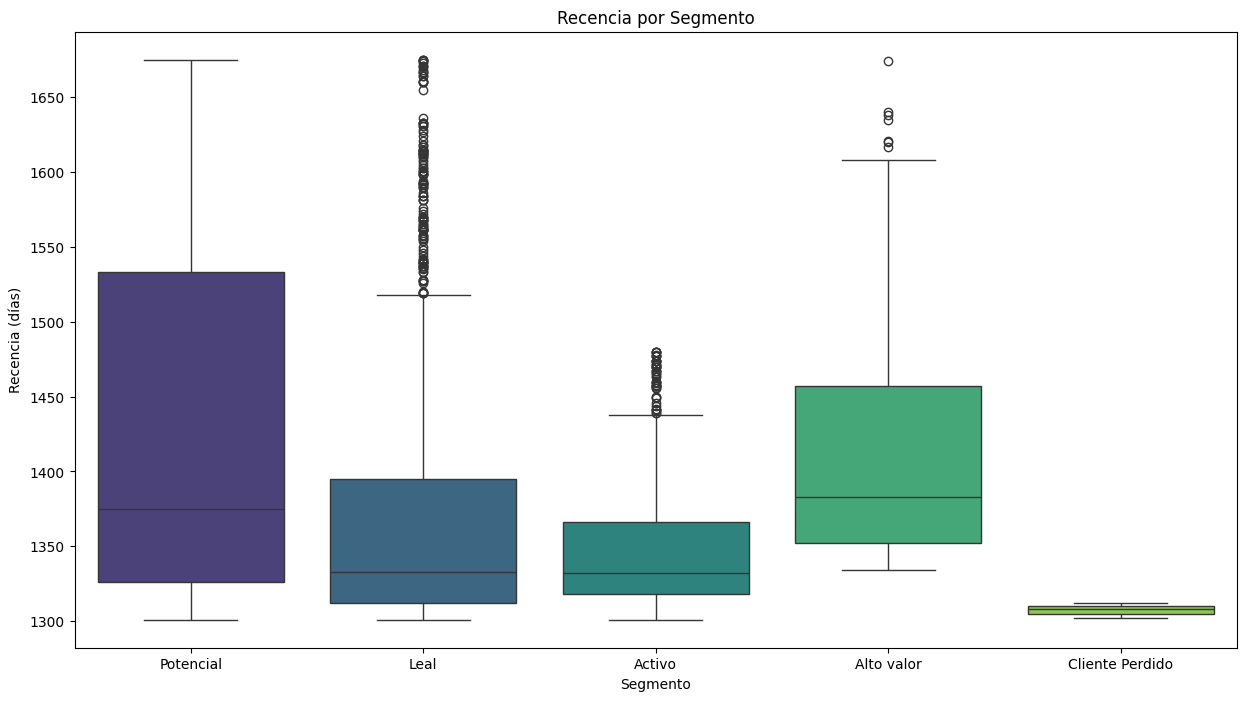

In [60]:
# Gráfico de Caja y Bigote para Recencia por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Recency', palette='viridis', order=rfm_df['Segment'].value_counts().index)
plt.title('Recencia por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Recencia (días)')
#plt.xticks(rotation=45)
plt.show()

C:\Users\karin\AppData\Local\Temp\ipykernel_36664\2943196759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_df, x='Segment', y='Frequency', palette='viridis', order=rfm_df['Segment'].value_counts().index)


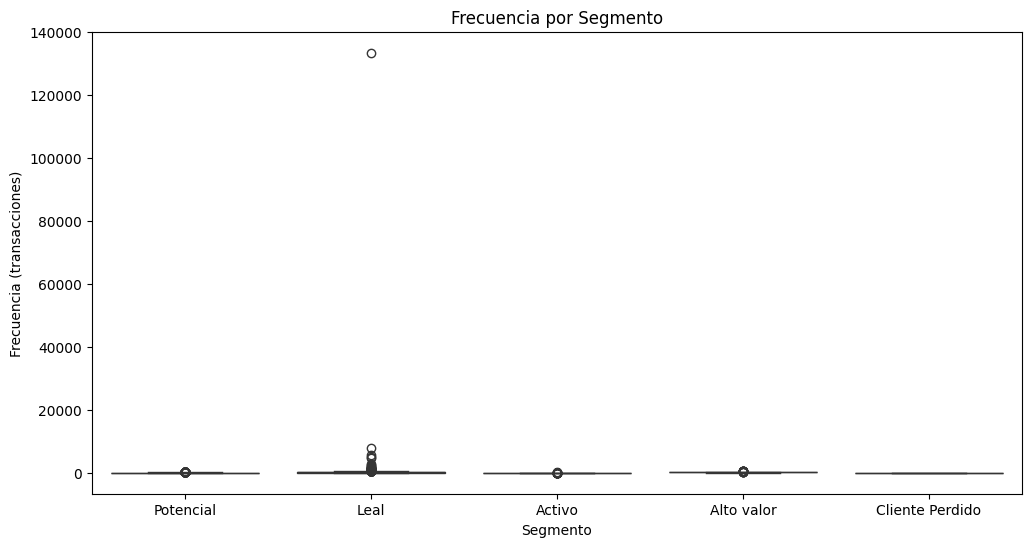

In [41]:
# Gráfico de Caja y Bigote para Frecuencia por Segmento
plt.figure(figsize=(12, 6))
sns.boxplot(data=rfm_df, x='Segment', y='Frequency', palette='viridis', order=rfm_df['Segment'].value_counts().index)
plt.title('Frecuencia por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia (transacciones)')
#plt.xticks(rotation=45)
plt.show()


C:\Users\karin\AppData\Local\Temp\ipykernel_36664\324454862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_df, x='Segment', y='Monetary', palette='viridis', order=rfm_df['Segment'].value_counts().index)


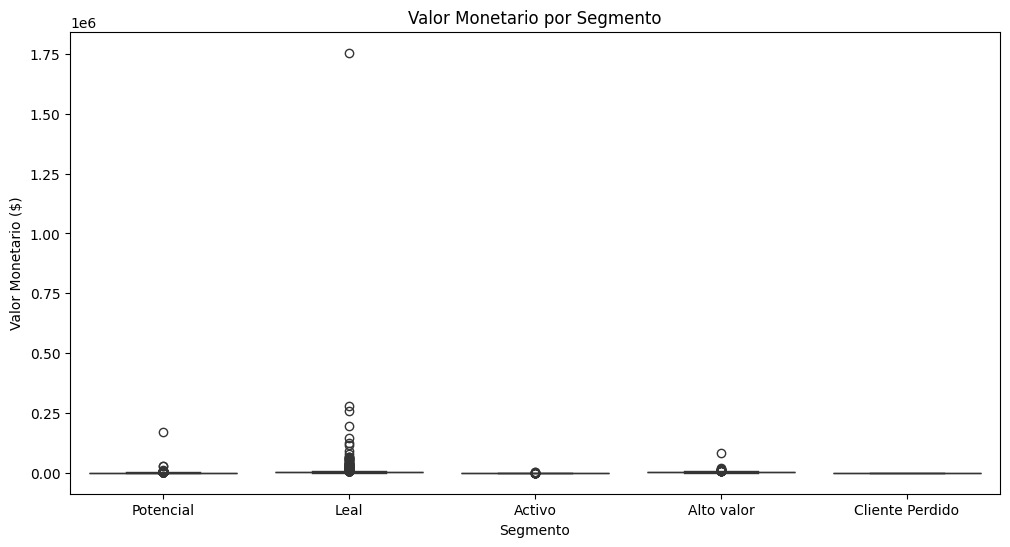

In [42]:
# Gráfico de Caja y Bigote para Valor Monetario por Segmento
plt.figure(figsize=(12, 6))
sns.boxplot(data=rfm_df, x='Segment', y='Monetary', palette='viridis', order=rfm_df['Segment'].value_counts().index)
plt.title('Valor Monetario por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Valor Monetario ($)')
#plt.xticks(rotation=45)
plt.show()

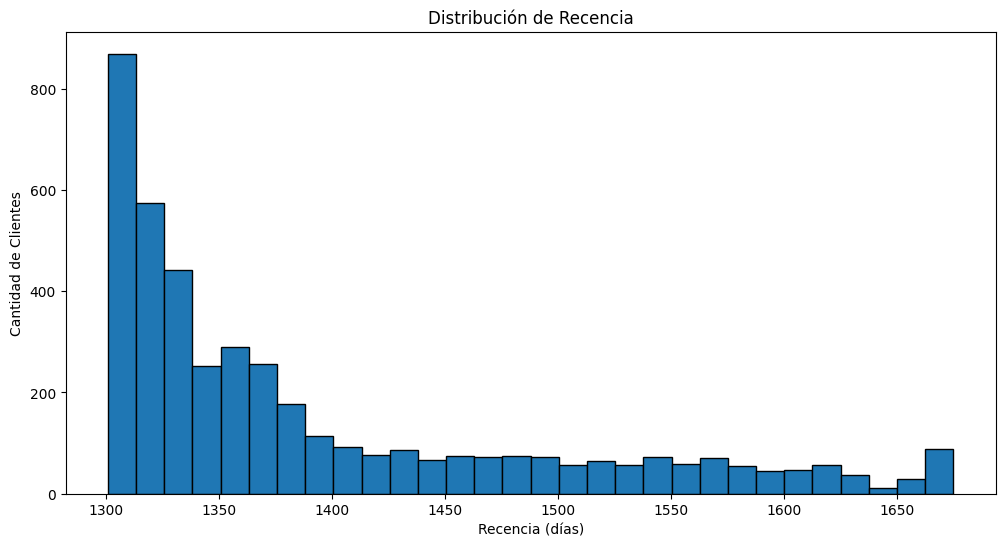

In [43]:
# Histogramas
plt.figure(figsize=(12, 6))
rfm_df['Recency'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Recencia')
plt.xlabel('Recencia (días)')
plt.ylabel('Cantidad de Clientes')
plt.show()

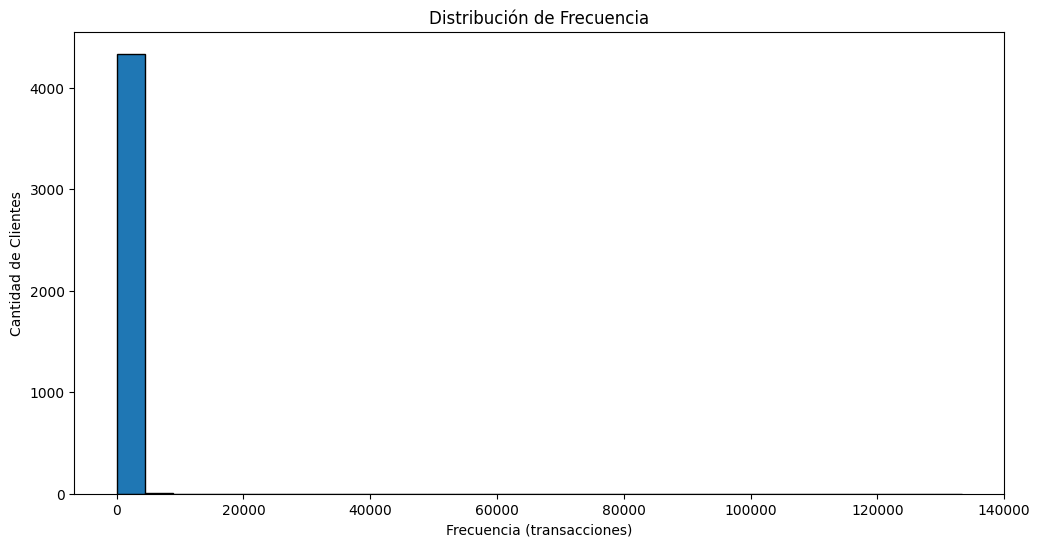

In [44]:
plt.figure(figsize=(12, 6))
rfm_df['Frequency'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Frecuencia')
plt.xlabel('Frecuencia (transacciones)')
plt.ylabel('Cantidad de Clientes')
plt.show()


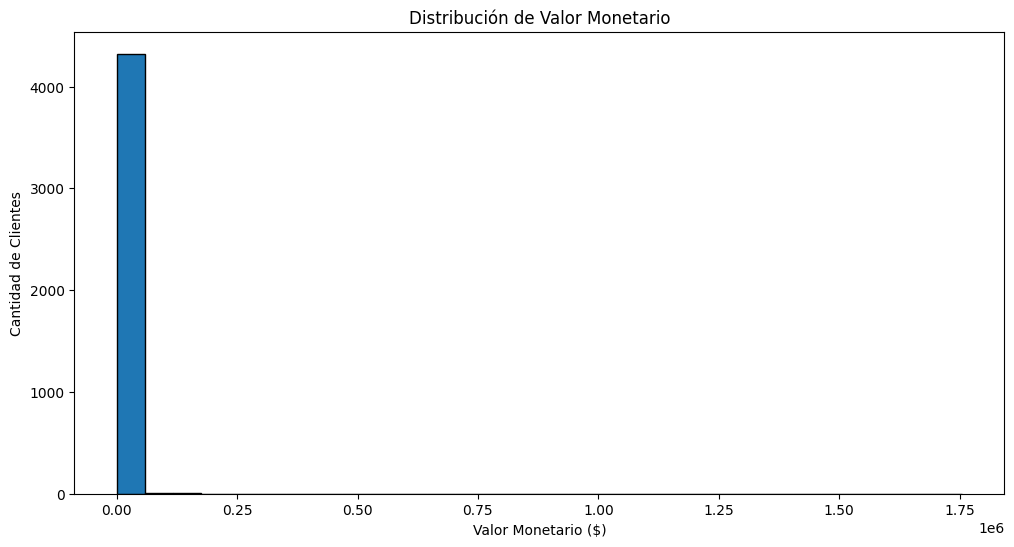

In [45]:

plt.figure(figsize=(12, 6))
rfm_df['Monetary'].hist(bins=30, edgecolor='black', grid= False)
plt.title('Distribución de Valor Monetario')
plt.xlabel('Valor Monetario ($)')
plt.ylabel('Cantidad de Clientes')
plt.show()


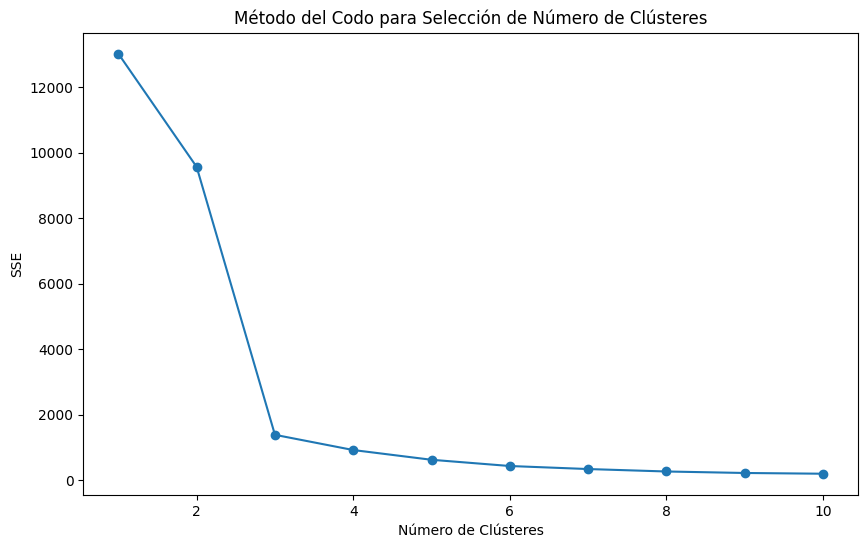

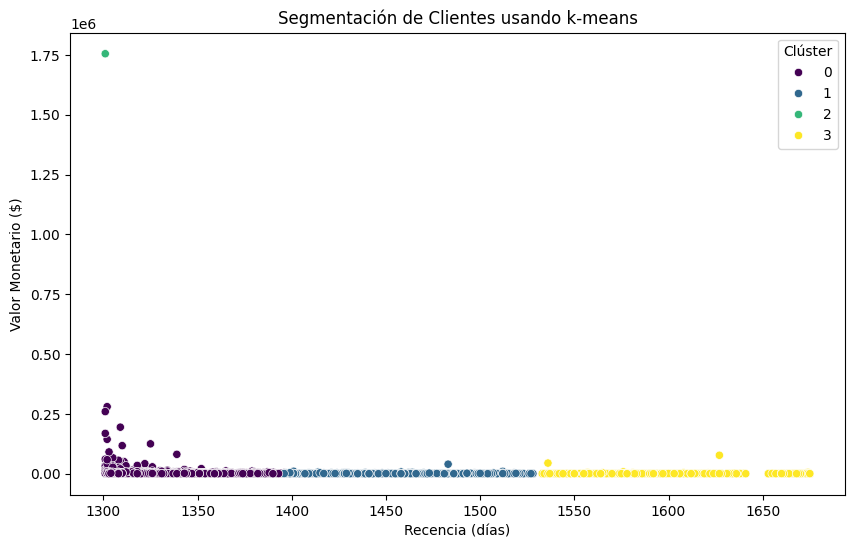

Cluster
0    2934
1     799
3     606
2       1
Name: count, dtype: int64


Recency         Frequency             Monetary                 
           mean  median      mean    median       mean     median count
Cluster                                                                
0        1333.3  1326.0     119.7      61.0     2697.9      981.3  2934
1        1457.8  1457.0      40.3      26.0      781.2      455.2   799
2        1301.0  1301.0  133359.0  133359.0  1755276.6  1755276.6     1
3        1597.7  1590.0      23.7      16.0      613.0      289.3   606

In [46]:
# Normalizar los datos
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Método del codo para encontrar el número óptimo de clústeres
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Selección de Número de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
plt.show()

# Aplicar k-means con el número óptimo de clústeres (supongamos k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes usando k-means')
plt.xlabel('Recencia (días)')
plt.ylabel('Valor Monetario ($)')
plt.legend(title='Clúster')
plt.show()

# Distribución de clientes por clúster
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
display(cluster_summary)


Cluster Summary Sorted by Monetary Value:
          Recency  Frequency   Monetary
Cluster                               
3         1597.7       23.7      613.0
1         1458.7       40.1      779.7
0         1333.6      115.8     2228.1
4         1306.6     1450.9   172508.5
2         1301.0   133359.0  1755276.6


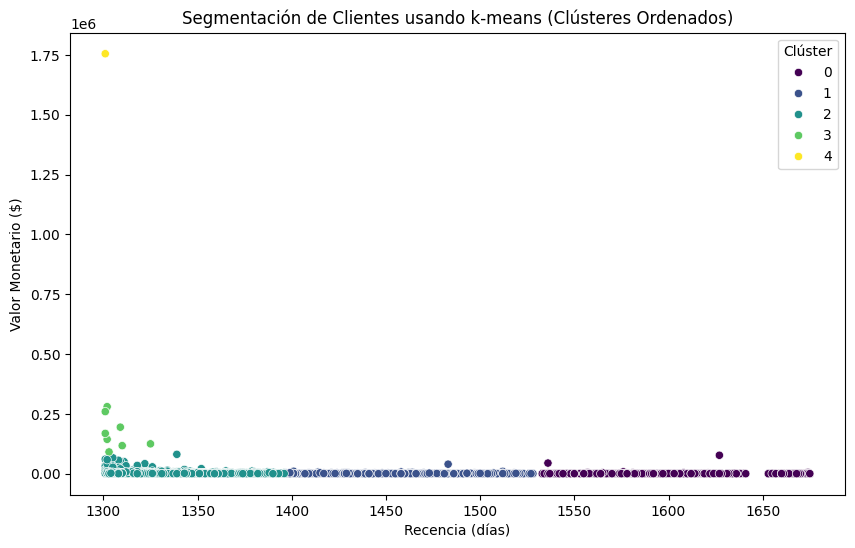

Cluster
2    2938
1     787
0     606
3       8
4       1
Name: count, dtype: int64
Cluster Summary Ordered:
         Recency         Frequency             Monetary                 
           mean  median      mean    median       mean     median count
Cluster                                                                
0        1597.7  1590.0      23.7      16.0      613.0      289.3   606
1        1458.7  1458.0      40.1      25.0      779.7      446.9   787
2        1333.6  1326.0     115.8      60.0     2228.1      976.3  2938
3        1306.6  1302.5    1450.9     839.5   172508.5   156148.8     8
4        1301.0  1301.0  133359.0  133359.0  1755276.6  1755276.6     1


In [47]:
# Aplicar k-means con el número óptimo de clústeres k=4
kmeans = KMeans(n_clusters=5, random_state=42)

rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Calcular estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Ordenar los clústeres por valor monetario promedio
cluster_summary = cluster_summary.sort_values(by='Monetary')
print("Cluster Summary Sorted by Monetary Value:\n", cluster_summary)

# Crear un diccionario para mapear los clústeres originales a los nuevos clústeres ordenados
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(cluster_summary.index)}

# Reasignar los números de clústeres en el DataFrame original
rfm_df['Cluster'] = rfm_df['Cluster'].map(cluster_mapping)

# Visualizar los clústeres ordenados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes usando k-means (Clústeres Ordenados)')
plt.xlabel('Recencia (días)')
plt.ylabel('Valor Monetario ($)')
plt.legend(title='Clúster')
plt.show()

# Distribución de clientes por clúster ordenado
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster ordenado
cluster_summary_ordered = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
print("Cluster Summary Ordered:\n", cluster_summary_ordered)

In [48]:
rfm_df.sample(10)

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment,Cluster
3609,17286,1322,153.92,45,2,3,1,6,Activo,2
621,13165,1347,1021.48,42,3,3,4,10,Leal,2
1228,14012,1578,328.80,11,5,1,2,8,Potencial,0
2732,16071,1345,326.24,21,3,2,2,7,Potencial,2
2520,15773,1306,635.68,10,1,1,3,5,Activo,2
4105,17962,1443,102.83,35,4,3,1,8,Potencial,1
2782,16136,1360,709.38,37,3,3,3,9,Potencial,2
2115,15227,1337,1219.40,58,3,3,4,10,Leal,2
1294,14100,1438,194.90,26,4,2,1,7,Potencial,1
2302,15480,1417,905.50,45,4,3,3,10,Leal,1


In [49]:
def churn(row):
    if row == 'Cliente Perdido':
        return 1 # cliente perdido o que probablemente abandone pronto
    else:
        return 0 #menos probabilidad de abandono 



rfm_df['Churn'] = rfm_df['Segment'].apply(churn)

In [50]:
rfm_df.sample(10)

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment,Cluster,Churn
956,13632,1325,2121.27,146,2,5,5,12,Leal,2,0
1098,13828,1323,209.49,15,2,2,1,5,Activo,2,0
469,12951,1309,1064.07,63,1,4,4,9,Potencial,2,0
2631,15923,1674,127.08,21,5,2,1,8,Potencial,0,0
1560,14473,1375,234.34,7,4,1,1,6,Activo,2,0
574,13102,1302,6424.09,304,1,5,5,11,Leal,2,0
3515,17146,1406,749.78,35,4,3,3,10,Leal,1,0
2001,15081,1323,504.80,33,2,3,3,8,Potencial,2,0
3622,17303,1663,250.04,53,5,3,1,9,Potencial,0,0
2963,16383,1375,668.36,102,4,4,3,11,Leal,2,0
